In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



In [4]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    transform= ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [5]:
image , label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
image.shape 

torch.Size([1, 28, 28])

In [7]:
len(train_data.data) , len(train_data.targets) , len(test_data.data) , len(test_data.targets)

(60000, 60000, 10000, 10000)

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

(-0.5, 27.5, 27.5, -0.5)

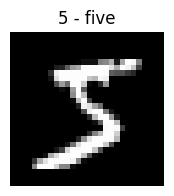

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

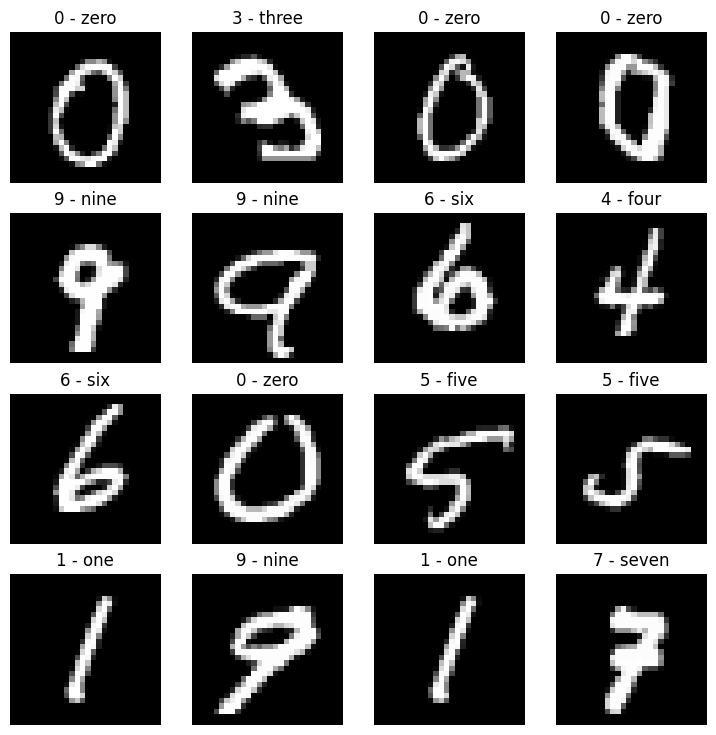

In [10]:
fig = plt.figure(figsize=(9,9))
rows , cols =4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img , label= train_data[random_idx]
    fig.add_subplot(rows , cols ,i)
    plt.imshow(img.squeeze() , cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


In [11]:
train_data.targets[:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [12]:
from torch.utils.data import DataLoader
BATCH_SIZE =32 
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
print(f"test dataloader:{test_dataloader} || Train dataloader:{train_dataloader}")
print(f"length of training dataloader:{len(train_dataloader)}")
print(f"length of testing dataloader:{len(test_dataloader)}")

test dataloader:<torch.utils.data.dataloader.DataLoader object at 0x000002C1EED151C0> || Train dataloader:<torch.utils.data.dataloader.DataLoader object at 0x000002C1EED16780>
length of training dataloader:1875
length of testing dataloader:313


In [13]:
train_features_batch , train_target_batch = next(iter(train_dataloader))
train_features_batch.shape , train_target_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.int64

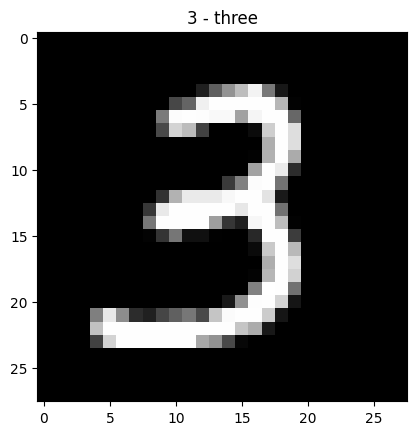

In [14]:
plt.imshow(train_features_batch[0].squeeze(), cmap="gray")
plt.title(class_names[train_target_batch[0]])
train_target_batch[0].dtype

# Model

In [13]:
class NumMNIST(nn.Module):
    def __init__(self, input_size,hidden_units, output_size):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_size, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_size),
        )

    def forward(self, x):
        return self.layer_stack(x)
    

model_0 = NumMNIST(input_size=784,
                   hidden_units=60,
                   output_size=len(class_names))
model_0

NumMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=60, bias=True)
    (2): ReLU()
    (3): Linear(in_features=60, out_features=60, bias=True)
    (4): ReLU()
    (5): Linear(in_features=60, out_features=10, bias=True)
  )
)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


loss_fn = nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(model_0.parameters(), lr=0.1)


NameError: name 'model_0' is not defined

# Training

In [16]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss =0
    for batch ,(X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 ==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /=len(train_dataloader)

    ## Testing
    test_loss=0
    test_acc=0
    model_0.eval()
    with torch.inference_mode():
        for (X,y) in test_dataloader:
            test_pred=model_0(X)
            test_loss += loss_fn(test_pred,y)
            test_acc +=accuracy_fn(y, test_pred.argmax(dim=1))
        test_loss /=len(test_dataloader)
        test_acc /=len(test_dataloader)
    print(f"Train loss:{train_loss} | test loss :{test_loss} | test acc :{test_acc}")




Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.3797772228717804 | test loss :0.17191274464130402 | test acc :94.65854632587859
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.14657925069332123 | test loss :0.11263610422611237 | test acc :96.44568690095846
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.10573744028806686 | test loss :0.11256644874811172 | test acc :96.45567092651757
Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.08453916758298874 | test loss :0.1008058115839

KeyboardInterrupt: 

In [ ]:
model_0.eval()
test_loss=0
test_acc =0
with torch.inference_mode():
    for (X,y) in test_dataloader:
        test_pred = model_0(X)
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y,test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(f"Test loss : {test_loss} || Test accuracy:{test_acc}")

Test loss : 0.18961842358112335 || Test accuracy:94.04952076677316


In [ ]:
# MODEL_PATH="model_0.pth"
# torch.save(model_0.state_dict() , f=MODEL_PATH)

In [ ]:
# model_0_loaded = NumMNIST(784,60,10)
# model_0_loaded.load_state_dict(torch.load(MODEL_PATH))
# model_0_loaded.state_dict()

<All keys matched successfully>

In [ ]:
# model_0_loaded.eval()
# test_loss = 0
# test_acc = 0
# with torch.inference_mode():
#     for (X, y) in test_dataloader:
#         test_pred = model_0_loaded(X)
#         test_loss += loss_fn(test_pred, y)
#         test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
#     test_loss /= len(test_dataloader)
#     test_acc /= len(test_dataloader)

# print(f"Test loss : {test_loss} || Test accuracy:{test_acc}")

Test loss : 0.18961842358112335 || Test accuracy:94.04952076677316


# Model ( Convolution layer )


In [ ]:
# Create a convolutional neural network
class MNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,  # how big is the square that's going over the image?
                      stride=1,  # default
                      # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)  # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


torch.manual_seed(42)
model_1 = MNISTModelV2(input_shape=1,
                              hidden_units=20,
                              output_shape=len(class_names))
model_1

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()
        y_pred = model_1(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)
                               }/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)

    # Testing
    test_loss = 0
    test_acc = 0
    model_1.eval()
    with torch.inference_mode():
        for (X, y) in test_dataloader:
            test_pred = model_1(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Train loss:{train_loss} | test loss :{test_loss} | test acc :{test_acc}")

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.2246597707271576 | test loss :0.06910904496908188 | test acc :97.81349840255591
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.05989134684205055 | test loss :0.06711531430482864 | test acc :97.78354632587859
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.0455632284283638 | test loss :0.03827236592769623 | test acc :98.75199680511182
Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.03751761466264725 | test loss :0.03408590331673